# Create Stunning Fractal Art with Python: A Tutorial For Beginners And Hardcore Math Lovers
## With a single line of code or even less


### Introduction

The phrase "I've never seen anything more beautiful" should only be used for fractals. Sure, there is the Mona Lisa, Van Gokh's paintings (which all have been ruined by AI-generated art, by the way), but I don't think any artist or human, could create anything as royally amazing as fractals. 

On the left, we have the iconic fractal, the Mandelbrot's set, discovered in NNNN when Python or no graphing software was available. 

![](images/opening.gif)

The Mandelbrot's set is a set of complex numbers that when plotted on the complex plane, forms the self-repeating shape we see. Every number in the set can also be a seed to __Julia sets__ and you can see the beauties appearing as I move around the mouse inside the boundary of the Mandelbrot's set. 

But before we can plot the Mandelbrot or Julia sets (but, believe me, we will), we have got a quite ground to cover. If you are here just to see the cool pictures, I highly recommend downloading the [open-source Fraqtive software](https://fraqtive.mimec.org/), which I used to generate the above GIF and the one below:

![](images/zoom.gif)

If you just want to plot the Mandelbrot set in Python with a single line of code, here it is (no, the subtitle was not clickbait):

In [1]:
from PIL import Image

Image.effect_mandelbrot((512, 512), (-3, -2.5, 2, 2.5), 100).show()

But if you want to go down the beautiful rabbit hole of fractals and learn how to plot them and most importantly, color them appropriately, then read on, possibly for a couple more articles. In this post, we will only learn how to plot a black-white vanilla Mandelbrot using Matplotlib and NumPy. Then, we will take things to a whole new level with Pillow in the future articles.

Let's get started. 

### Complex numbers in Python

Python programmers don't deal with complex numbers on a daily-basis. As we will be working with them a lot in this tutorial, this section will serve as a primer. 

You can create an imaginary part of a complex number by appending the literal _j_ to integers or floats.

In [2]:
num1 = 2 + 1j
num2 = 12.3 + 23.1j

type(num1)

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


complex

If seeing imaginary numbers represented with _j_ instead of _i_ confuses you (hello, mathematicians), you can use the `complex` built-in function:

In [3]:
2 + 3j == complex(2, 3)

True

Once created, you can access the real and imaginary components of complex numbers with `real` and `imag` attributes:

In [4]:
num1.real

2.0

In [5]:
num2.imag

23.1

Another important property of complex numbers for the purposes of this article is their absolute value. An absolute value or modulus of a complex number is a measure of its distance from the origin (0, 0) in the complex plane. It is defined as the square root of the sum of its real and imaginary parts (thank you, Pythagoras).

In [6]:
abs(1 + 3.14j)

3.295390720385065

These will be enough for us to create some awesome things. Let's get started!

### Simple formula, grand set

Our journey starts by finding out if some complex number _c_ belongs to the Mandelbrot's Set, which is surprisingly easy. All we have to do is to put it through the below formula and create a sequence of _z_ values:

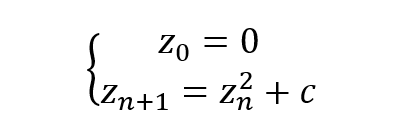

The first _z_ is always 0, as defined above. Subsequent elements are found by squaring the previous _z_ and adding _c_ to the result.

Let's implement the process in Python. We will define a `sequence` function that returns the first `n` elements for a given `c`:

In [7]:
def sequence(c, n=7) -> list:
    z_list = list()
    
    z = 0
    for _ in range(n):
        z = z ** 2 + c
        z_list.append(z)
    
    return z_list

Let's try this function on a bunch of random numbers and print the results nicely:

In [8]:
import pandas as pd

df = pd.DataFrame()
df['element'] = [f"z_{i}" for i in range(7)]

# Random numbers
cs = [0, 1, -1, 2, 0.25, -.1]

for c in cs:
    df[f"c={c}"] = sequence(c)
    
df

,element,c=0,c=1,c=-1,c=2,c=0.25,c=-0.1
0,z_0,0,1,-1,2,0.250000,-0.100000
1,z_1,0,2,0,6,0.312500,-0.090000
2,z_2,0,5,-1,38,0.347656,-0.091900
3,z_3,0,26,0,1446,0.370865,-0.091554
4,z_4,0,677,-1,2090918,0.387541,-0.091618
5,z_5,0,458330,0,4371938082726,0.400188,-0.091606
6,z_6,0,210066388901,-1,19113842599189892819591078,0.410150,-0.091608


We see three types of results: when _c_ is either 1 or 2, the sequence is unbounded (diverges to infinity) as the sequence grows. When it is -1, the sequence goes back and forth between 0 and -1. As for 0.25 and -0.1, they stay pretty small or bounded. 

So, which of these five numbers belong to the Mandelbrot's set?

### Are you stable?

The rule is simple - if _c_ makes the sequence diverge to infinity, it is not in the Mandelbrot's set. In fractals jargon, that _c_ is called unstable. Or, let's ditch the negativity, the given complex number _c_ is stable if its corresponding _Z_ sequence remains bounded. 

Now, we have to figure out how many members of _Z_ to look at before classifying _c_ as stable or unstable. This _iteration count_ is not obvious to find as the formula is sensitive to even the smallest changes to _c_. 

But fortunately, people have been studying the set for a long enough time to know that all Mandelbrots stay bounded within a radius of two. This means we can perform a few dozen iteration and the numbers that stay relatively small or below two are probably in the Mandelbrot's set. 

So, let's create a new function `is_stable` using this logic:

In [9]:
def is_stable(c, n_iterations=20):
    z = 0
    
    for _ in range(n_iterations):
        z = z ** 2 + c
        
        if abs(z) > 2:
            return False
    return True

In the body of this boolean function, we set `z` to 0 and run it through the algorithm in a loop, controlled by `n_iterations`. In each iteration, we are checking the magnitude of `z` so that we can terminate the loop if it exceeds 2 early on. 

The last `return` statement is only executed if `z` is below 2 after all the iterations. Let's check a few numbers:

In [10]:
is_stable(1)

False

In [11]:
is_stable(0.2)

True

In [12]:
is_stable(0.26)

True

In [13]:
is_stable(0.26, n_iterations=30)

False

Note how increasing `n_iterations` to 30 changes the stability of 0.26. Generally, values close to the fractals edge require more iterations to make a more accurate classification and create more detailed visuals. 

### How to plot the Mandelbrot's set in Matplotlib?

Our ultimate aim for the article is to produce this guy in Matplotib:

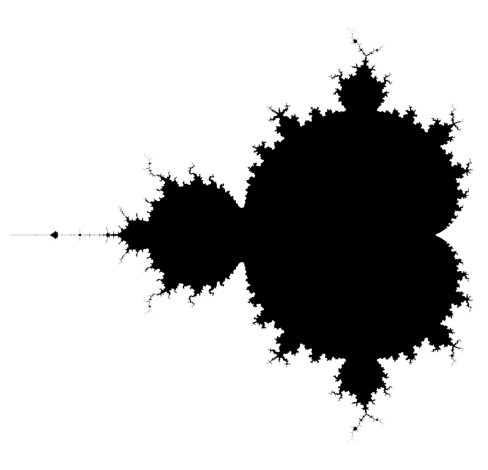

The image was created by marking all the Mandelbrots black and unstable elements white. In Matplotlib, grayscale has 256 shades or ranges from 0 to 255, 0 being fully white and 255 being pitch black. But you can normalize this range into a range of 0 and 1, so that 0 is white and 1 is black.

This normalization comes in handy for us. We can create a 2D array of complex numbers and run our `is_stable` function over each element. The resulting array will have 1s for Mandelbrots and 0s for the unstable. When we plot this array as an image, viola, we have the above visual. 

Let's get to it. First, we create the function that generates a matrix of candidate values we can iterate over:

In [22]:
import numpy as np


def candidate_values(xmin, xmax, ymin, ymax, pixel_density):
    # Generate a 2D grid of real and imaginary values
    real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
    imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))
    
    # Cross each row of `xx` with each column of `yy` to create a grid of values
    xx, yy = np.meshgrid(real, imag)
    
    # Combine the real and imaginary parts into complex numbers
    matrix = xx + 1j * yy
    
    return matrix

We will use the `np.linspace` function to create evenly spaced numbers within a range. The `pixel_density` parameter dynamically sets the number of pixels per unit.

For example, a matrix with a horizontal range of (-2, 0), a vertical range of (-1.2, 1.2) and a `pixel_density` of 1, would have the shape (2, 2). This means our resulting Mandelbrot image would be 2 pixels wide and 2 pixels tall, which is a low, looow resolution image.

In [23]:
c = candidate_values(-2, 0, -1.2, 1.2, 1)

c.shape

(2, 2)

So, we better use a higher density like 25:

In [26]:
c = candidate_values(-2, 0, -1.2, 1.2, 25)

c.shape

(60, 50)

Now, to run our `is_stable` function over each element of `c`, we vectorize it with `np.vectorize` and call it with 20 iterations:

In [35]:
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=25)

mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=20)
mandelbrot_mask.shape

(60, 67)

We are calling the resulting array a `mandelbrot_mask` since it returns True (1) for each Mandelbrot. To plot this array, we use the `imshow` function with a `binary` colormap. That will make the image black and white. 

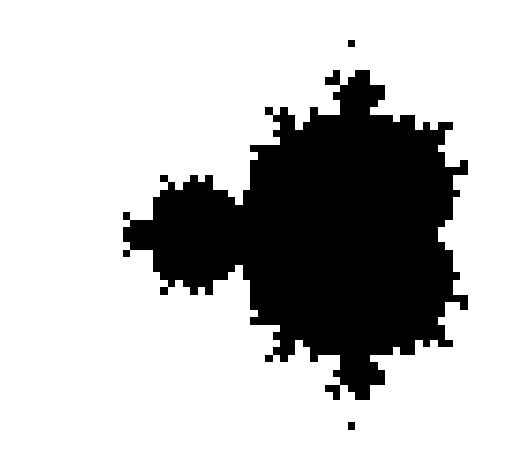

In [39]:
import matplotlib.pyplot as plt

plt.imshow(mandelbrot_mask, cmap="binary")

# Turn of the axes and use tight layout
plt.axis("off")
plt.tight_layout()

Well, that is one ugly Mandelbrot. How about we increase the pixel density to 1024 and the iteration count to 30?

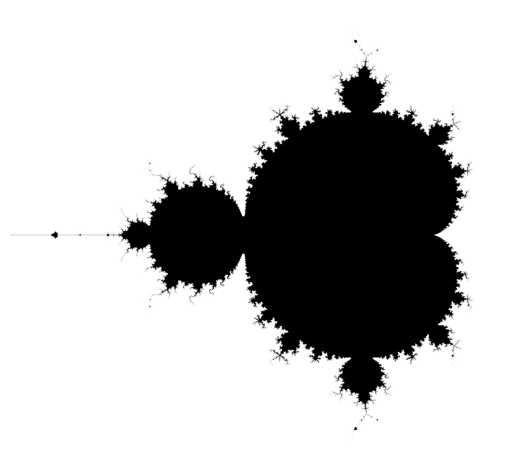

In [41]:
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=1024)

mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=30)

plt.imshow(mandelbrot_mask, cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()

Now, this looks more like it! Congratulations on plotting your first Mandelbrot image!

### Wait, that wasn't art, this is!

Even though our current fractal still looks very cool, it is far from the art I promised. So, let's give it a makeover by focusing not just the set numbers but the numbers around the edge. Because, looking at this image, we can all types of interesting patterns emerging around the boundaries:

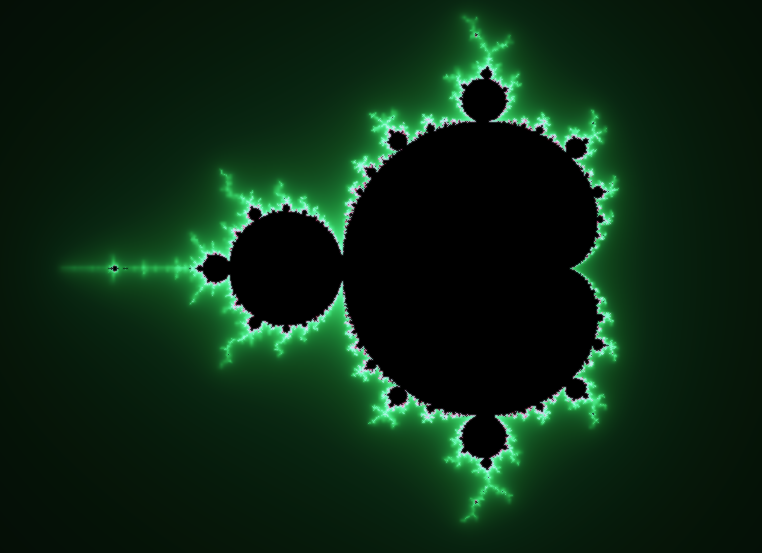

Let's start the makeover by organizing our code into a class, because it is a real mess with all functions scattered. 

The class name will be `Mandelbrot` and we will use dataclasses so that we don't have to create the `__init__` constructor like a caveman:

In [55]:
from dataclasses import dataclass

@dataclass
class Mandelbrot:
    n_iterations: int
    
    def is_stable(self, c: complex) -> bool:
        z = 0
    
        for _ in range(self.n_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return False

        return True

The class only requires the `max_iteration` parameter to be initialized. We also add the `is_stable` function as a class method. 

In [56]:
mandelbrot = Mandelbrot(n_iterations=30)

mandelbrot.is_stable(0.1)

True

In [57]:
mandelbrot.is_stable(1 + 4.4j)

False

Up until now, we have been coloring only the Mandelbrot's black and the rest white. But if we also want to make the edge of the fractal nice, we have to come up with a logic to color the unstable elements based on how close they are to the boundary of the set.

One way we can do this is by determining in how many iterations a complex number becomes unstable. Some will become unstable very fast but others may take hundreds or thousands of iterations. In general though, numbers close to the fractal's edge are less unstable than those far away. 

Using this information, we can give each pixel (complex number) different depths of color based on the iteration they terminate. This is called the Escape Count algorithm. Let's implement it in our class:

In [58]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations

First, we change `n_iterations` to `max_iterations`, as it makes more sense. Then, we create an `escape_count` method that returns the iteration the unstable `c` terminates the loop or if it is stable, returns the `max_iterations` itself.

In [60]:
mandelbrot = Mandelbrot(max_iterations=50)

mandelbrot.escape_count(-.1) # stable

50

In [69]:
mandelbrot.escape_count(0.26) # unstable

29

Now, we create another method to measure the stability based on the iteration count:

In [70]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations

The `stability` method returns a measure between 0 and 1, which we can later use to determine the color depths. Only Mandelbrot's set elements will return `max_iterations`, so they will be marked with 1. 

With this logic, we can bring back our `is_stable` function but make it much shorter:

In [71]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations
    
    def is_stable(self, c: complex) -> bool:
        return self.stability(c) == 1

In [73]:
mandelbrot = Mandelbrot(max_iterations=50)

mandelbrot.stability(-.1)

1.0

In [74]:
mandelbrot.is_stable(-.1)

True

In [75]:
mandelbrot.stability(2)

0.02

In [76]:
mandelbrot.is_stable(2)

False

Now, we create a final method to `plot` the set with Matplotlib:

In [167]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations
    
    def is_stable(self, c: complex) -> bool:
        return self.stability(c) == 1
    
    @staticmethod
    def candidate_values(xmin, xmax, ymin, ymax, pixel_density):
        real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
        imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))

        xx, yy = np.meshgrid(real, imag)
        matrix = xx + 1j * yy

        return matrix
    
    
    def plot(self, xmin, xmax, ymin, ymax, pixel_density=64, cmap="gray_r"):
        c = Mandelbrot.candidate_values(xmin, xmax, ymin, ymax, pixel_density)
        
        # Apply `stability` over all elements of `c`
        c = np.vectorize(self.stability)(c)
        
        plt.imshow(c, cmap=cmap, extent=[0, 1, 0, 1])
        plt.gca().set_aspect("equal")
        plt.axis('off')
        plt.tight_layout()

In `plot`, we apply the `stability` method over all elements of `c`, so the resulting matrix holds color depths in each cell. When we plot this matrix with a reversed grayscale colormap (so that the set elements stay black), we get the following image:

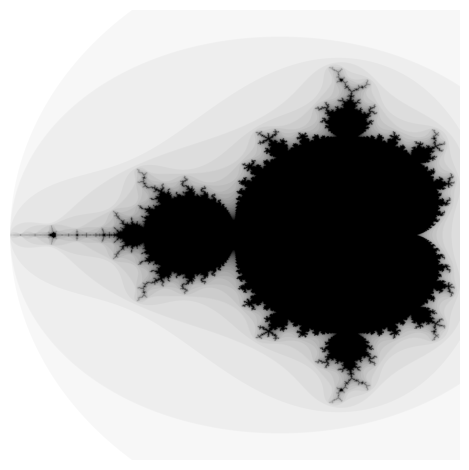

In [154]:
mandelbrot = Mandelbrot(max_iterations=30)

mandelbrot.plot(
    xmin=-2, xmax=0.5, 
    ymin=-1.5, ymax=1.5, 
    pixel_density=1024,
)

We can already see bands with different levels of grey appearing around the edges. Let's give it another colormap that isn't grayscale:

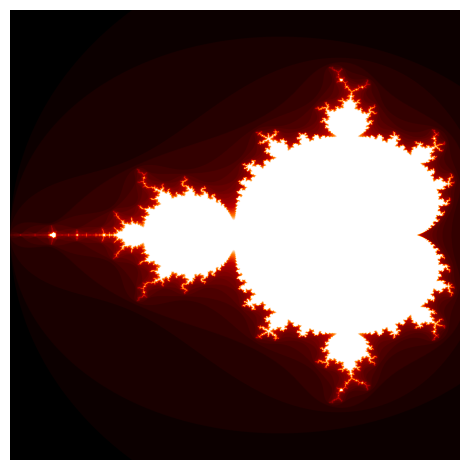

In [169]:
mandelbrot = Mandelbrot(max_iterations=30)

mandelbrot.plot(
    xmin=-2, xmax=0.5, 
    ymin=-1.5, ymax=1.5, 
    pixel_density=1024,
    cmap="gist_heat"
)

Pay attention how the boundary lines are the brightest of red and how white spots still appear where the set repeats itself. 

### Conclusion

Our final result was almost art. But, there are a lot of improvements we can make. The first thing is improving the image resolution by having a finer control over each pixel. Then, we have to remove that annoying white space around the image.

All these tasks are shortcomings of Matplotlib but in the next article, we will take things to a whole new level with Pillow, Python's image manipulation library.

[Stay tuned](https://ibexorigin.medium.com/)!